# <center> IS 445 Final Project</center>
## <center> Gun Violence in the United States </center>

<center>Aditya Sharma, Tao - Ke Chorng 

<br>
<br>
Chinmay Yadav, Tejas Tumakuru Ashok, Michael Torres
    </center

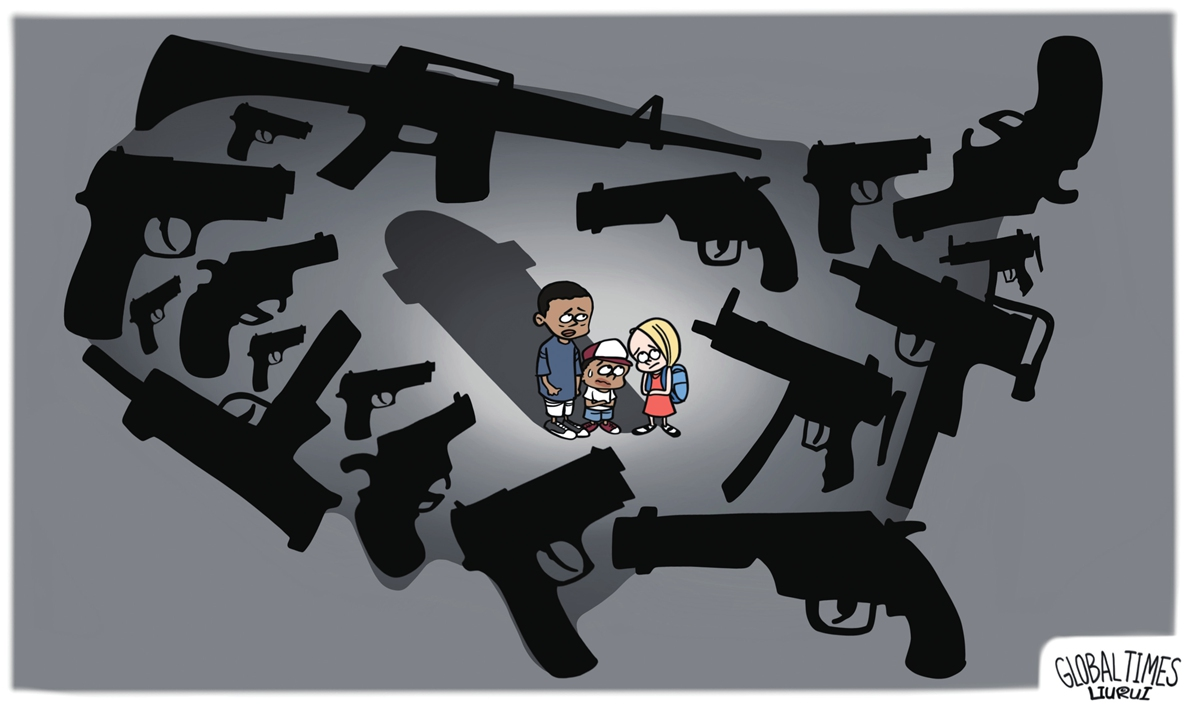

## What is the dataset?

In our final project we explored the dataset from The Gun Violence Archive organization, which collected data from over 7,500  law enforcement, media, government and commercial sources daily in an effort to provide near-real time data about the results of gun violence. The dataset include the data of nearly every incident around the country from Jan 2013 to Mar 2018 and the detailed information of each incident.

## Why is this important?

Gun violence in the United States results in tens of thousands of deaths and injuries annually. In 2018, the most recent year for which data are available as of 2021, the Centers for Disease Control and Prevention's (CDC's) National Center for Health Statistics reports 38,390 deaths by firearm, of which 24,432 were by suicide. About 1.4 million people have died from firearms in the U.S. between 1968 and 2011. 
<br>

This number includes all deaths resulting from a firearm, including suicides, homicides, and accidents. Legislation at the federal, state, and local levels has attempted  to address gun violence through a variety of methods, including restricting firearms purchases by youths  and other "at-risk" populations, setting waiting periods for firearm purchases, establishing gun buyback  programs, law enforcement and policing strategies, stiff sentencing of gun law violators, education programs  for parents and children, and community-outreach programs. 
<br>

The Congressional Research Service in 2009 estimated  there were 310 million firearms in the U.S., not including weapons owned by the military. Of these, 114 million were handguns, 110 million were rifles, and 86 million were shotguns. In that same year, the Census bureau stated the population of people in the U.S. at 306 million. Accurate figures for civilian gun ownership are difficult to determine. While the number of guns in civilian hands has been on the increase,[citation needed] the percentage of Americans and American households who claim to own guns has been in long-term decline, according to the General Social Survey. It found that gun ownership by households has declined steadily from about half, in the late 1970s and early 1980s, down to 32% in 2015.

### Now, let's explore the data

In [ ]:
pip install shapely

In [ ]:
pip install geopandas

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import csv
import numpy as np
import os
from IPython.display import display
from IPython.display import Image
import ipywidgets as widgets

from matplotlib.pylab import rcParams
import plotly.express as px
import plotly.graph_objects as go

import plotly.offline as pyo
pyo.init_notebook_mode()

In [4]:
df = pd.read_csv("gv.csv")

# Data Visualizations:

This prototype hand drawing gives an insight on the number of incidences per year from 2013 to 2018.
<br>
We can tell from this image that 2013 has the least numbers because the dataset description was missing and unreport. 
<br>
Also we can know the number of incidences is rising per year.

In [52]:
Image(url= "prototype.jpg", width=550, height=550)

Based on the information we learned from the prototype hand drawing, this hand drawing displays the number of incidences per month in different years. We can tell from this the drawing that we expect from the increasing number of incidences, also we can tell Jul and Aug have the highest incidences every year.

In [38]:
Image(url= "handdrawn.jpg", width=550, height=550)

The plot below visualizes the Number of People injured vs Number of People killed (Congressional District wise).
We are trying to understand the congressional district that has highest Gun Violences

Text(0.5, 1.0, '# of people killed vs Injured with Congressional District wise')

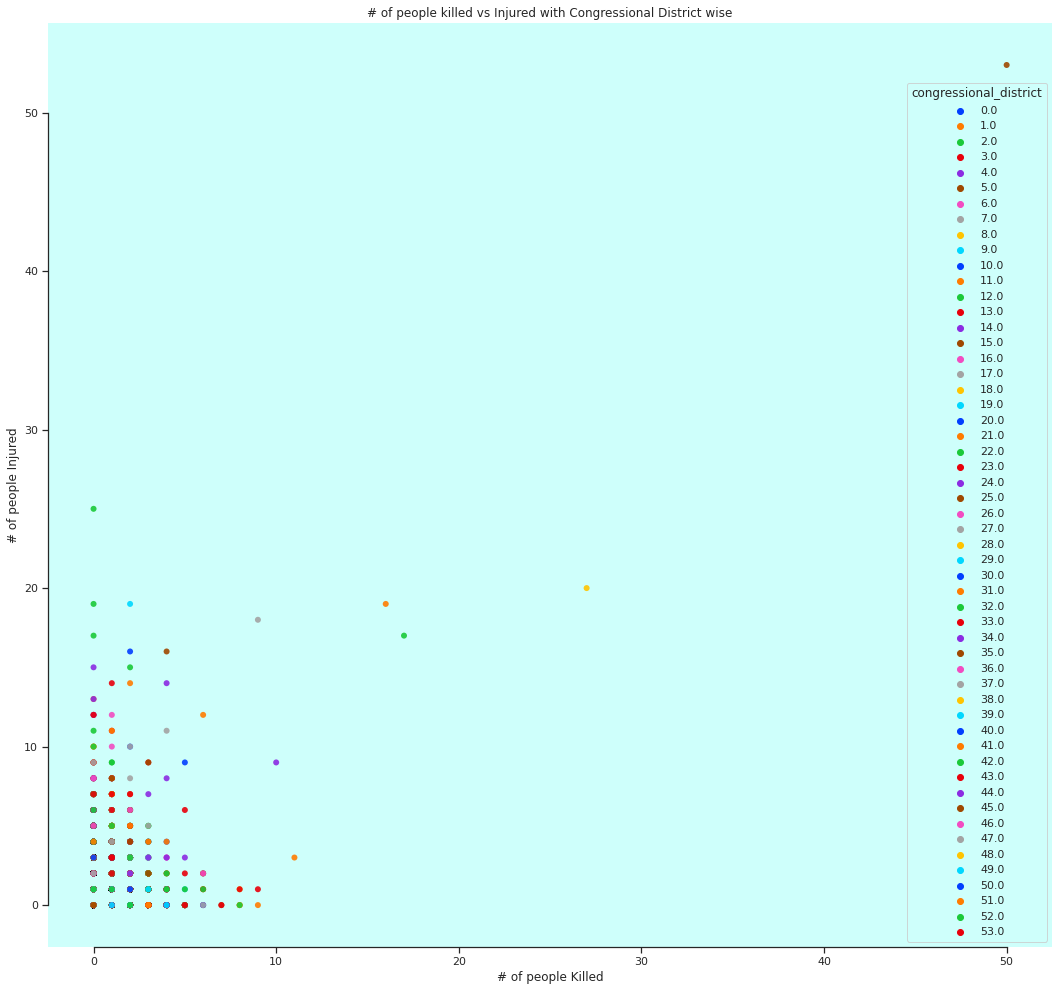

In [7]:
plt.figure(figsize = (18,17))
sns.set_style("ticks", { "grid.linestyle": ":",
                            "xtick.color": ".15",
                            "axes.facecolor": "#CEFFFB",
                            "ytick.left": True,
                            "figure.facecolor": 'white',
                            "grid.color": 'black'})

sns.scatterplot(x = 'n_killed', 
                y = 'n_injured', 
                hue = "congressional_district", 
                data = df,
                palette = "bright",
                edgecolor = 'none',
                alpha = .9)

sns.set_context("notebook", font_scale = 1, rc = {"lines.linewidth" : 5.5})
sns.despine(offset = 0.2, trim = True)

plt.xlabel('# of people Killed')
plt.ylabel('# of people Injured')
plt.title('# of people killed vs Injured with Congressional District wise')


The plot below visualizes the Number of People injured vs Number of People killed (State wise).
Here, we are plotting a strip plot to figure out the density of Gun violence per state.

Text(0.5, 1.0, '# of people killed vs Injured with State wise')

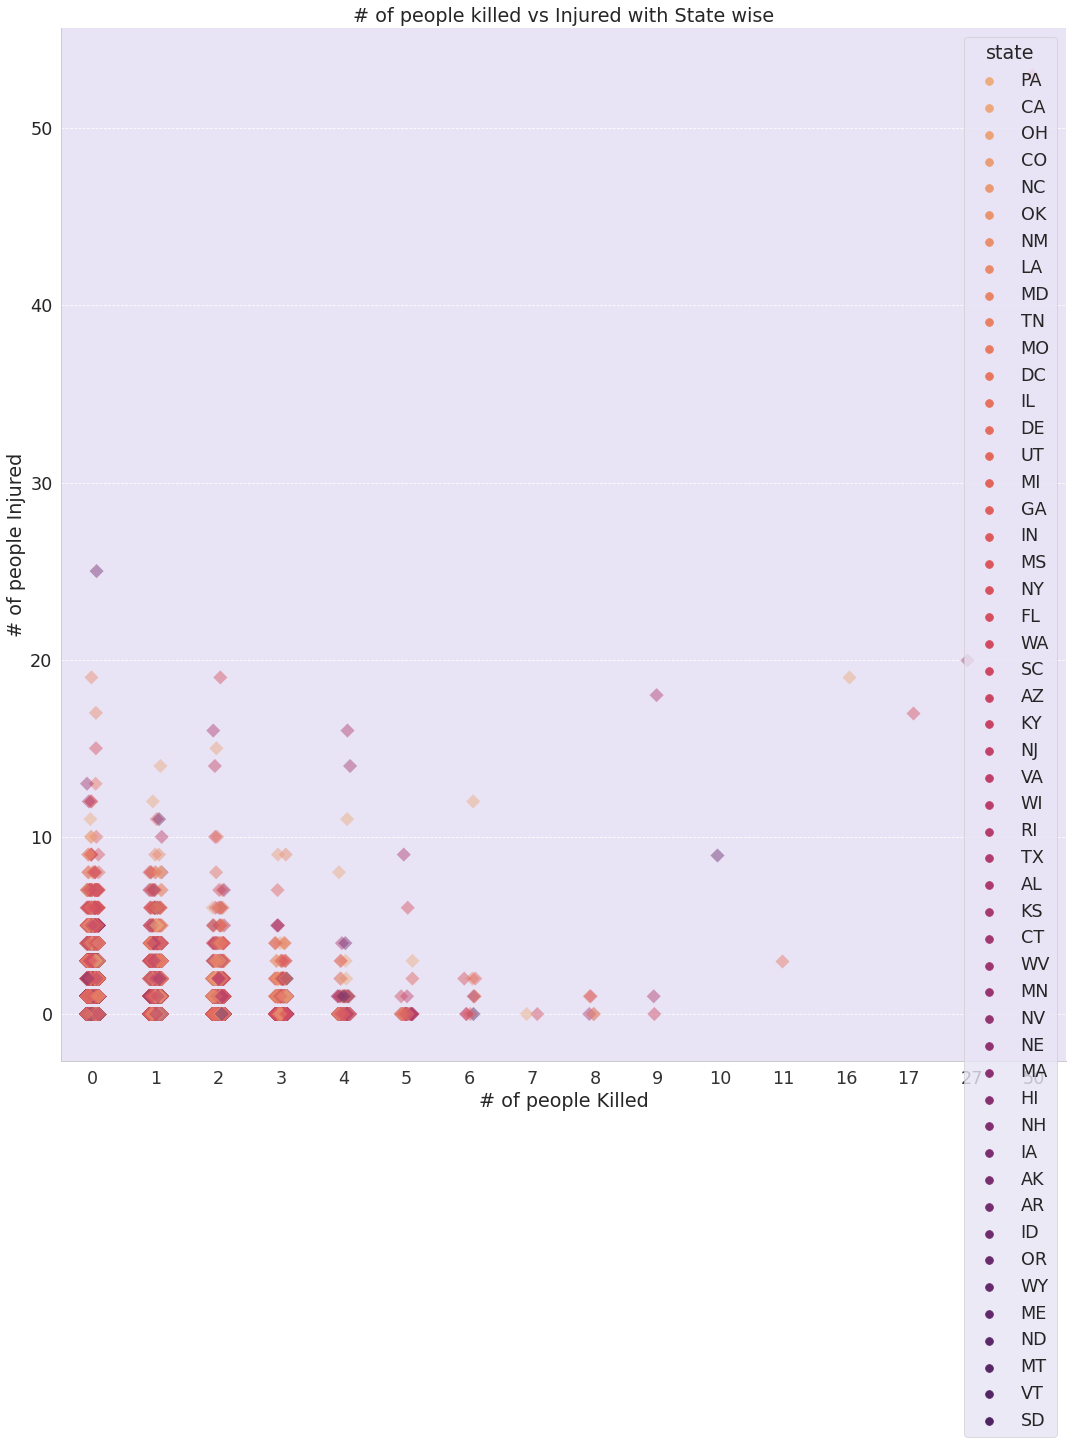

In [54]:
plt.figure(figsize = (18,19))

sns.set_style("whitegrid", {"grid.linestyle": "--",
                            "xtick.color": ".2",
                            "axes.facecolor": "#E8E4F5",
                            "ytick.left": False,
                            "figure.facecolor": 'white',
                            "grid.color": 'white'})


ax = sns.stripplot(x = df["n_killed"], y = df['n_injured'], hue = df["state"],
                  palette = "flare", size = 10, marker = "D", edgecolor = "gray", alpha = .45, dodge = False)

sns.set_context("paper", font_scale = 2, rc = {"lines.linewidth" : 3})
sns.despine(offset = 0.4, trim = False)

plt.xlabel('# of people Killed')
plt.ylabel('# of people Injured')
plt.title('# of people killed vs Injured with State wise')

In [19]:
dates = pd.DatetimeIndex(df['date'])

dates.year

Int64Index([2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=239677)

In [21]:
x = pd.DatetimeIndex.strftime(dates,"%Y")

In [22]:
year_conversion= x.to_frame(index=False,name='Year')

In [23]:
Final_Data=pd.concat([df,year_conversion],axis=1)
Final_Data['Year']=Final_Data['Year'].astype(int)

This plot gives us a insight on the number of people killed from the year 2013 to 2018. Min. number of people were killed in 2013 but then again in the dataset description it was given that many cases were not reported. The max was for 2017 and there was a sudden decrease for 2018, which can again be a problem as to when was the last date when it was reported and added. But in general there is a increase in the number of people killed.

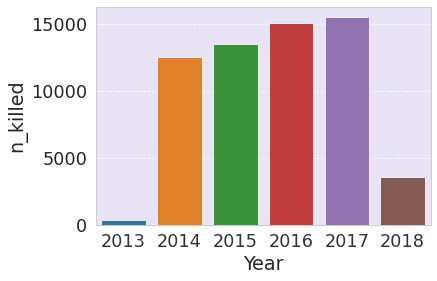

In [33]:
kill_sum = Final_Data.groupby(['Year'], as_index=False)['n_killed'].sum()
plot1=sns.barplot(x="Year",y= 'n_killed',data = kill_sum)

Similarly, the number of guns involved have also increased, so we can infer that as the number of guns is increasing, the number of people killed have increased.

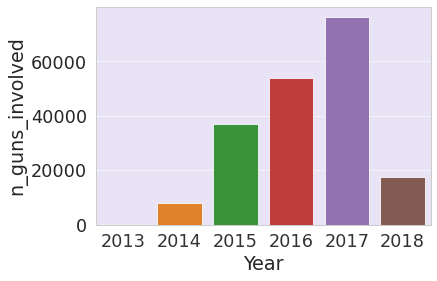

In [30]:
gun_sum = Final_Data.groupby(['Year'], as_index=False)['n_guns_involved'].sum()
Plot_1=sns.barplot(x = 'Year',y= 'n_guns_involved',data = gun_sum)

This is a rough try which was made where in the graph was plotted for longitude and latitude, the plot seems fine but there some anomaly in the data it seems as some points go out of U.S which means the data is wrong.

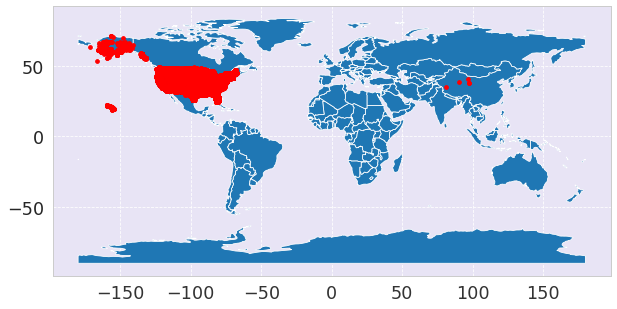

In [32]:
geometry = [Point(xy) for xy in zip(Final_Data['longitude'], Final_Data['latitude'])]
gdf = GeoDataFrame(Final_Data, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

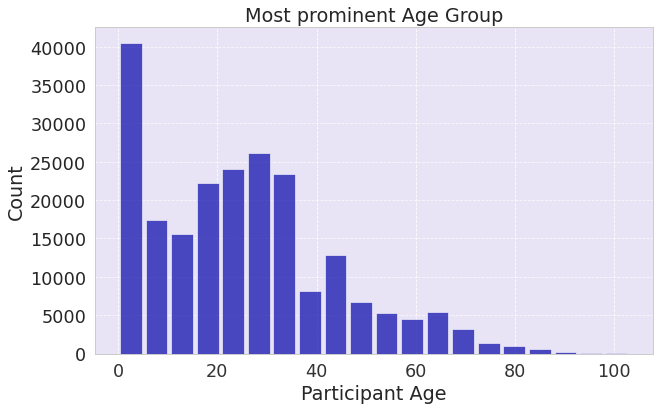

In [42]:
rcParams['figure.figsize'] = 10,6

df1 = df['participant_age']
df1.dropna(inplace=True)

final_array= " "
for i in df1.index:
    temp= df1[i].split('||')
    temp1 = []
    for j in  range (0,len(temp)):
        temp1 = temp1 + (temp[j].split("::"))
    for k in range(1, len(temp1), 2):
        final_array= final_array + (temp1[k]) + " "
final_array=(final_array.split())

plt.hist(final_array, bins=20, color='#0504aa',
                            alpha=.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Participant Age')
plt.ylabel('Count')
plt.title('Most prominent Age Group')
plt.gca().set_xscale('linear')

For this column above (participant age), the values had to separated because they are provided in a key-pair format.

So we have written a function which separates the ages.

Then we plot a histogram to visualize the values, where we see that among the people involved in gun violence, a surprising number of people are below age 20, which is a pretty alarming situation and some measures need to be taken to curb this.

In [45]:
us_state_abbrev = {
'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'District of Columbia':'DC','Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

df['state'] = df['state'].map(us_state_abbrev).fillna(df['state'])

In [46]:
statekill = df[["state","n_killed"]].reset_index()
statekill= statekill.groupby("state")['n_killed'].sum().reset_index()
statekill.columns = ['State',"Killings"]

The graph below shows the relationship between the number of deaths across America due to gun violence along with the concentrated numbers upon hovering over each state.

In [65]:
fig1 = px.choropleth(statekill,
                    locations="State",
                    color="Killings", 
                    locationmode = 'USA-states',
                    color_continuous_scale="Reds",
) 
fig1.update_layout(
    title = {
        'text':"Gun Violence Deaths Across America <br><sup> Confirmed deaths due to gun violence from 2013-2018 </sup>",
        'x':0.5,
        'xanchor':'center'
    },
    geo= dict(  
        scope = "usa",
        projection=go.layout.geo.Projection(type="albers usa"),
        showlakes=True,
        lakecolor='white'
    ),
    margin=dict(l=0, r=0, t=50,b=0),
    font=dict(size=12),     
    coloraxis_colorbar=dict(
        title="Amount of Deaths",
    )
)
fig1.data[0].marker.line.color = "white"

In [66]:
stateinjury = df[["state","n_injured"]].reset_index()
stateinjury= stateinjury.groupby("state")['n_injured'].sum().reset_index()
stateinjury.columns = ['State',"Injured"]

Similarly to the graph above, this graph shows the relationship between the number of injuries due to gun violence across the United States. 

In [67]:
fig2 = px.choropleth(stateinjury,
                    locations="State",
                    color="Injured", 
                    locationmode = "USA-states",
                    color_continuous_scale="Oranges",
) 
fig2.update_layout(
    title = {
        'text':"Gun Violence Injuries Across America <br><sup> Confirmed injuries due to gun violence from 2013-2018 </sup>",
        'x':0.5,
        'xanchor':'center'
    },
    geo= dict(  
        scope = "usa",
        projection=go.layout.geo.Projection(type="albers usa"),
        showlakes=True,
        lakecolor='white'
    ),
    margin=dict(l=0, r=0, t=50,b=0),
    font=dict(size=12),     
    coloraxis_colorbar=dict(
        title="Amount of Injuries",
    )
)

fig2.data[0].marker.line.color = "white"

Now, let's update out datasets from data pulled from the gun violence archive!

In [68]:
import requests as r 
from io import StringIO

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}

mydf= r.get("https://www.gunviolencearchive.org/export-finished/download?uuid=99d3ff0d-76d2-4042-bf55-15417482432b&filename=public%3A//export-01aa4618-47e5-44b1-8a8e-b97475b5bd28.csv",headers=headers).text

newdf = pd.read_csv(StringIO(mydf))
newdf

Incident ID      Incident Date           State  \
0         2183667   December 6, 2021    Pennsylvania   
1         2182789   December 5, 2021        Michigan   
2         2183120   December 5, 2021           Texas   
3         2181840   December 3, 2021       Tennessee   
4         2181096   December 2, 2021  North Carolina   
...           ...                ...             ...   
1995      1046961  February 10, 2018        Kentucky   
1996      1044234   February 7, 2018         Florida   
1997      1043447   February 5, 2018        Colorado   
1998      1042280   February 3, 2018            Ohio   
1999      1040815   January 31, 2018        Missouri   

                    City Or County  \
0                     Philadelphia   
1                          Detroit   
2                          El Paso   
3                          Memphis   
4                   Elizabeth City   
...                            ...   
1995                   Paintsville   
1996          Lake Worth (Lantana)   
1997              Colorado Springs   
1998  Cleveland (Garfield Heights)   
1999                   Saint Louis   

                                           Address  # Killed  # Injured  \
0                          1500 block of N 29th St         0          4   
1                     5200 block of Marlborough St         2          2   
2                                2910 Tularosa Ave         1          3   
3                          3885 Elvis Presley Blvd         2          2   
4                           Perry St and Jordan St         3          3   
...                                            ...       ...        ...   
1995                                   413 Mill St         5          0   
1996                         I-95 and W Lantana Rd         3          3   
1997                                4225 Galley Rd         2          4   
1998                            11321 Broadway Ave         1          5   
1999  Goodfellow Blvd and Dr Martin Luther King Dr         0          4   

      Operations  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
1995         NaN  
1996         NaN  
1997         NaN  
1998         NaN  
1999         NaN  

[2000 rows x 8 columns]

In [69]:
newdf['State'] = newdf['State'].map(us_state_abbrev).fillna(newdf['State'])
newdfkill = newdf[["State","# Killed"]].reset_index()
newkill = newdfkill.groupby("State")['# Killed'].sum().reset_index()
newkill.columns = ["State","Killings"]

finalkill= statekill.set_index('State').add(newkill.set_index('State'),fill_value=0).reset_index()
finalkill

State  Killings
0     AK     273.0
1     AL    1943.0
2     AR     795.0
3     AZ    1123.0
4     CA    5774.0
5     CO     840.0
6     CT     349.0
7     DC     480.0
8     DE     229.0
9     FL    4033.0
10    GA    2521.0
11    HI      63.0
12    IA     282.0
13    ID     171.0
14    IL    3557.0
15    IN    1654.0
16    KS     550.0
17    KY    1086.0
18    LA    2257.0
19    MA     485.0
20    MD    1742.0
21    ME     115.0
22    MI    1659.0
23    MN     474.0
24    MO    2206.0
25    MS    1219.0
26    MT     159.0
27    NC    2306.0
28    ND      69.0
29    NE     229.0
30    NH      88.0
31    NJ    1202.0
32    NM     510.0
33    NV     814.0
34    NY    1752.0
35    OH    2586.0
36    OK     955.0
37    OR     452.0
38    PA    2473.0
39    RI      63.0
40    SC    1674.0
41    SD      94.0
42    TN    1877.0
43    TX    5248.0
44    UT     287.0
45    VA    1500.0
46    VT      57.0
47    WA     879.0
48    WI     891.0
49    WV     347.0
50    WY      75.0

In [70]:
fig3 = px.choropleth(finalkill,
                    locations="State",
                    color="Killings", 
                    locationmode = 'USA-states',
                    color_continuous_scale="OrRd",
) 
fig3.update_layout(
    title = {
        'text':"Live:Gun Violence Deaths Across America <br><sup> Confirmed deaths due to gun violence from 2013-2021 </sup>",
        'x':0.5,
        'xanchor':'center'
    },
    geo= dict(  
        scope = "usa",
        projection=go.layout.geo.Projection(type="albers usa"),
        showlakes=True,
        lakecolor='white'
    ),
    margin=dict(l=0, r=0, t=50,b=0),
    font=dict(size=12),     
    coloraxis_colorbar=dict(
        title="Amount of Deaths",
    )
)
fig3.data[0].marker.line.color = "white"
#fig3.show()

Let's do the same with the injured choropleth graph!

In [71]:
newdfinjured = newdf[["State","# Injured"]].reset_index()
newdfinjured['State'] = newdfinjured['State'].map(us_state_abbrev).fillna(newdf['State'])

newinjury = newdfinjured.groupby("State")['# Injured'].sum().reset_index()
newinjury.columns = ["State","Injured"]
finalinjury= stateinjury.set_index('State').add(newinjury.set_index('State'),fill_value=0).reset_index()
finalinjury

State  Injured
0     AK    337.0
1     AL   3203.0
2     AR   1455.0
3     AZ   1166.0
4     CA   8279.0
5     CO   1271.0
6     CT   1313.0
7     DC   1581.0
8     DE    899.0
9     FL   7524.0
10    GA   4320.0
11    HI     85.0
12    IA    870.0
13    ID    155.0
14    IL  14517.0
15    IN   3097.0
16    KS    975.0
17    KY   1978.0
18    LA   4803.0
19    MA   1773.0
20    MD   3424.0
21    ME    133.0
22    MI   3217.0
23    MN   1032.0
24    MO   3851.0
25    MS   2018.0
26    MT    140.0
27    NC   4843.0
28    ND    130.0
29    NE    708.0
30    NH    148.0
31    NJ   2758.0
32    NM    580.0
33    NV   1017.0
34    NY   5476.0
35    OH   6068.0
36    OK   1593.0
37    OR    738.0
38    PA   5464.0
39    RI    359.0
40    SC   3318.0
41    SD    119.0
42    TN   4719.0
43    TX   6652.0
44    UT    411.0
45    VA   3718.0
46    VT     73.0
47    WA   1352.0
48    WI   2221.0
49    WV    658.0
50    WY     54.0

In [72]:
fig4 = px.choropleth(finalinjury,
                    locations="State",
                    color="Injured", 
                    locationmode = "USA-states",
                    color_continuous_scale="RedOr",
) 
fig4.update_layout(
    title = {
        'text':"Live: Gun Violence Injuries Across America <br><sup> Confirmed injuries due to gun violence from 2013-2021 </sup>",
        'x':0.5,
        'xanchor':'center'
    },
    geo= dict(  
        scope = "usa",
        projection=go.layout.geo.Projection(type="albers usa"),
        showlakes=True,
        lakecolor='white'
    ),
    margin=dict(l=0, r=0, t=50,b=0),
    font=dict(size=12),     
    coloraxis_colorbar=dict(
        title="Amount of Injuries",
    )
)

fig4.data[0].marker.line.color = "white"
#fig4.show()

In [73]:
with open('phase3.html', 'a') as f:
    f.write(fig1.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig2.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig3.to_html(full_html=False, include_plotlyjs='cdn'))
    f.write(fig4.to_html(full_html=False, include_plotlyjs='cdn'))
    

## <center>Part 3 soon</center>

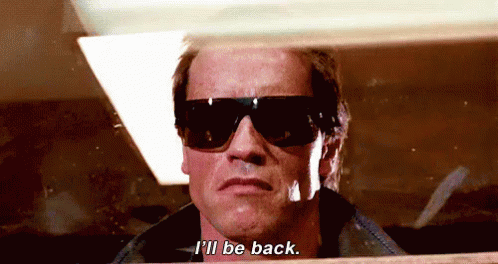